# Polars Introduction

Polars é uma biblioteca de manipulação de dataframes com sintexe semelhante ao Pandas, porém, utiliza processamento paralelo, com isso, se tornando superior em velocidade de processamento. 

## Instalação

In [ ]:
!pip install polars

In [5]:
!pip show polars

Name: polars
Version: 1.22.0
Summary: Blazingly fast DataFrame library
Home-page: https://www.pola.rs/
Author: 
Author-email: Ritchie Vink <ritchie46@gmail.com>
License: 
Location: c:\users\user\appdata\local\programs\python\python39\lib\site-packages
Requires: 
Required-by: 


### Pacotes usados nesse projeto

In [ ]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os 
import gc # Para limpar o cache nos benchmark de velocidade (Pandas vs Polars)
%matplotlib inline
from IPython.display import display

## 1. Documentação - Primeiros passos

Note: Sintaxe parecida com Pandas, basta traduzir.    ($Pandas \to Polars$)

In [2]:
df = pl.DataFrame(
    {
        "name": ["Gean", "Victor", "Marcos", "Marco"], 
        "niver": [
            dt.date(2004, 2, 24), 
            dt.date(1980, 3, 7), 
            dt.date(2003, 1, 1), 
            dt.date(1990, 1, 23),
        ], 
        "peso": [100.0, 40.4, 60.8, 100.9], # (kg)
        "altura": [1.80, 1.90, 1.79, 1.85], #(m)
    }
)

print(df)

shape: (4, 4)
┌────────┬────────────┬───────┬────────┐
│ name   ┆ niver      ┆ peso  ┆ altura │
│ ---    ┆ ---        ┆ ---   ┆ ---    │
│ str    ┆ date       ┆ f64   ┆ f64    │
╞════════╪════════════╪═══════╪════════╡
│ Gean   ┆ 2004-02-24 ┆ 100.0 ┆ 1.8    │
│ Victor ┆ 1980-03-07 ┆ 40.4  ┆ 1.9    │
│ Marcos ┆ 2003-01-01 ┆ 60.8  ┆ 1.79   │
│ Marco  ┆ 1990-01-23 ┆ 100.9 ┆ 1.85   │
└────────┴────────────┴───────┴────────┘


In [3]:
df.write_csv("output.csv")

In [4]:
df_csv = pl.read_csv("output.csv", try_parse_dates=True)
print(df_csv)

shape: (4, 4)
┌────────┬────────────┬───────┬────────┐
│ name   ┆ niver      ┆ peso  ┆ altura │
│ ---    ┆ ---        ┆ ---   ┆ ---    │
│ str    ┆ date       ┆ f64   ┆ f64    │
╞════════╪════════════╪═══════╪════════╡
│ Gean   ┆ 2004-02-24 ┆ 100.0 ┆ 1.8    │
│ Victor ┆ 1980-03-07 ┆ 40.4  ┆ 1.9    │
│ Marcos ┆ 2003-01-01 ┆ 60.8  ┆ 1.79   │
│ Marco  ┆ 1990-01-23 ┆ 100.9 ┆ 1.85   │
└────────┴────────────┴───────┴────────┘


In [6]:
pl.col("altura") / (pl.col("peso") ** 2) # exemplo de expressão

<Expr ['[(col("altura")) / (col("peso"…'] at 0x19F2A2E5F10>

#### Select

In [7]:
result = df.select(
    pl.col("name"), 
    pl.col("niver").dt.year().alias("dia_do_niver"), 
    (pl.col("altura") / (pl.col("peso") ** 2)).alias("BMI"),
)

print(result)

shape: (4, 3)
┌────────┬──────────────┬──────────┐
│ name   ┆ dia_do_niver ┆ BMI      │
│ ---    ┆ ---          ┆ ---      │
│ str    ┆ i32          ┆ f64      │
╞════════╪══════════════╪══════════╡
│ Gean   ┆ 2004         ┆ 0.00018  │
│ Victor ┆ 1980         ┆ 0.001164 │
│ Marcos ┆ 2003         ┆ 0.000484 │
│ Marco  ┆ 1990         ┆ 0.000182 │
└────────┴──────────────┴──────────┘


In [9]:
# Using name suffix

result = df.select(
    pl.col("name"), 
    (pl.col("altura", "peso") * 0.95).round(2).name.suffix("-5%"),
)

print(result)

shape: (4, 3)
┌────────┬───────────┬─────────┐
│ name   ┆ altura-5% ┆ peso-5% │
│ ---    ┆ ---       ┆ ---     │
│ str    ┆ f64       ┆ f64     │
╞════════╪═══════════╪═════════╡
│ Gean   ┆ 1.71      ┆ 95.0    │
│ Victor ┆ 1.81      ┆ 38.38   │
│ Marcos ┆ 1.7       ┆ 57.76   │
│ Marco  ┆ 1.76      ┆ 95.86   │
└────────┴───────────┴─────────┘


#### with_columns

In [10]:
result = df.with_columns(
    ano_niver=pl.col("niver").dt.year(), 
    BMI=pl.col("altura") / (pl.col("peso") ** 2)
)

print(result)

shape: (4, 6)
┌────────┬────────────┬───────┬────────┬───────────┬──────────┐
│ name   ┆ niver      ┆ peso  ┆ altura ┆ ano_niver ┆ BMI      │
│ ---    ┆ ---        ┆ ---   ┆ ---    ┆ ---       ┆ ---      │
│ str    ┆ date       ┆ f64   ┆ f64    ┆ i32       ┆ f64      │
╞════════╪════════════╪═══════╪════════╪═══════════╪══════════╡
│ Gean   ┆ 2004-02-24 ┆ 100.0 ┆ 1.8    ┆ 2004      ┆ 0.00018  │
│ Victor ┆ 1980-03-07 ┆ 40.4  ┆ 1.9    ┆ 1980      ┆ 0.001164 │
│ Marcos ┆ 2003-01-01 ┆ 60.8  ┆ 1.79   ┆ 2003      ┆ 0.000484 │
│ Marco  ┆ 1990-01-23 ┆ 100.9 ┆ 1.85   ┆ 1990      ┆ 0.000182 │
└────────┴────────────┴───────┴────────┴───────────┴──────────┘


##### Filter

In [12]:
result = df.filter(pl.col("niver").dt.year() > 2000)
print(result)

shape: (2, 4)
┌────────┬────────────┬───────┬────────┐
│ name   ┆ niver      ┆ peso  ┆ altura │
│ ---    ┆ ---        ┆ ---   ┆ ---    │
│ str    ┆ date       ┆ f64   ┆ f64    │
╞════════╪════════════╪═══════╪════════╡
│ Gean   ┆ 2004-02-24 ┆ 100.0 ┆ 1.8    │
│ Marcos ┆ 2003-01-01 ┆ 60.8  ┆ 1.79   │
└────────┴────────────┴───────┴────────┘


In [13]:
result = df.filter(
    pl.col("niver").is_between(dt.date(1990, 1, 1), dt.date(2010, 1, 1)), 
    pl.col("altura") > 1.7,  
)

print(result)

shape: (3, 4)
┌────────┬────────────┬───────┬────────┐
│ name   ┆ niver      ┆ peso  ┆ altura │
│ ---    ┆ ---        ┆ ---   ┆ ---    │
│ str    ┆ date       ┆ f64   ┆ f64    │
╞════════╪════════════╪═══════╪════════╡
│ Gean   ┆ 2004-02-24 ┆ 100.0 ┆ 1.8    │
│ Marcos ┆ 2003-01-01 ┆ 60.8  ┆ 1.79   │
│ Marco  ┆ 1990-01-23 ┆ 100.9 ┆ 1.85   │
└────────┴────────────┴───────┴────────┘


Group By

In [28]:
result = df.group_by(
    (pl.col("niver").dt.year() // 10 * 10).alias("decade"),
    maintain_order=True, # Seguir a ordem original do dataframe
).len()
print(result)

In [29]:
result = df.group_by(
    (pl.col("niver").dt.year() // 10 * 10).alias("decade"), 
    maintain_order=True,
).agg(
    pl.len().alias("sample_size"),
    pl.col("peso").mean().round(2).alias("Média de peso"), 
    pl.col("altura").max().alias("tallest"),
)

print(result)

shape: (3, 4)
┌────────┬─────────────┬───────────────┬─────────┐
│ decade ┆ sample_size ┆ Média de peso ┆ tallest │
│ ---    ┆ ---         ┆ ---           ┆ ---     │
│ i32    ┆ u32         ┆ f64           ┆ f64     │
╞════════╪═════════════╪═══════════════╪═════════╡
│ 2000   ┆ 2           ┆ 80.4          ┆ 1.8     │
│ 1980   ┆ 1           ┆ 40.4          ┆ 1.9     │
│ 1990   ┆ 1           ┆ 100.9         ┆ 1.85    │
└────────┴─────────────┴───────────────┴─────────┘


## 2. Testando Polars com Dataframe com mais de 13M de linhas

#### Pacote do Kaggle para baixar os Dataframes

Caso queira baixar manualmente o database, [clique aqui](https://www.kaggle.com/datasets/chumajin/heterogeneity-human-activity-recognition-dataset) para acessar o Kaggle. 

In [ ]:
!pip install kagglehub

#### Realiza o Download do Dataframe em um path especificado

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chumajin/heterogeneity-human-activity-recognition-dataset")

print("Path to dataset files:", path)

| Mode  | LastWriteTime       | Length      | Name                           |
|-------|---------------------|------------|--------------------------------|
| -a---- | 10/02/2025 11:11  | 6081012196 | edit_Phones_accelerometer.csv |
| -a---- | 10/02/2025 11:10  | 1291856600 | Phones_accelerometer.csv      |
| -a---- | 10/02/2025 11:10  | 1379220147 | Phones_gyroscope.csv          |
| -a---- | 10/02/2025 11:10  | 327168116  | Watch_accelerometer.csv       |
| -a---- | 10/02/2025 11:10  | 308345360  | Watch_gyroscope.csv           |


#### Database 

In [18]:
df = pl.read_csv("C:/Users/User/.cache/kagglehub/datasets/chumajin/heterogeneity-human-activity-recognition-dataset/versions/2/Phones_accelerometer.csv")

#### Comparação de tempo - Pandas VS Polars

📊 Análise dos tempos - Carregando os dados

    Pandas:
        CPU time: 11 s
        Wall time: 14 s

    Polars:
        CPU time: 8.36 s
        Wall time: 1.45 s ⏩ 10x mais rápido que Pandas!

In [43]:
%%time
df = pd.read_csv("C:/Users/User/.cache/kagglehub/datasets/chumajin/heterogeneity-human-activity-recognition-dataset/versions/2/Phones_accelerometer.csv",low_memory=False)

CPU times: total: 11 s
Wall time: 14 s


In [19]:
%%time
df = pl.read_csv("C:/Users/User/.cache/kagglehub/datasets/chumajin/heterogeneity-human-activity-recognition-dataset/versions/2/Phones_accelerometer.csv",low_memory=False)

CPU times: total: 8.36 s
Wall time: 1.45 s


In [21]:
df.shape

(13062475, 10)

In [61]:
df.head(3)

sample_id,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
i64,i64,i64,f64,f64,f64,str,str,str,str
0,1424696633908,1424696631913248572,-5.958191,0.6880646,8.135345,"""a""","""nexus4""","""nexus4_1""","""stand"""
1,1424696633909,1424696631918283972,-5.95224,0.6702118,8.136536,"""a""","""nexus4""","""nexus4_1""","""stand"""
2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,"""a""","""nexus4""","""nexus4_1""","""stand"""


## 3. Dados de jogos do Corinthians na Neo Química Arena (2014 - 2023)

#### Database

In [25]:
df = pl.read_csv("databases/sccpdb/A - Jogos.csv")

#### EDA

In [26]:
df.schema

Schema([('JOGO', Int64),
        ('RESULTADO', String),
        ('CORINTHIANS', String),
        ('GOL COR', Int64),
        ('GOL VIS', Int64),
        ('VISITANTE', String),
        ('CIDADE - VISITANTE', String),
        ('UF', String),
        ('PAIS', String),
        ('DIA', Int64),
        ('MES', Int64),
        ('ANO', Int64),
        ('HORA', String),
        ('DIA-SEMANA', String),
        ('CAMPEONATO', String),
        ('CAPITÃO', String),
        ('TÉCNICO', String),
        ('TÉCNICO - VISITANTE', String),
        ('PUBLICO', Float64),
        ('RENDA', String),
        ('CAMISA', Int64),
        ('SAÍDA DE JOGO', String),
        ('1 TEMPO', String),
        ('2 TEMPO', String),
        ('ARTILHEIROS', String),
        ('ARTILHEIROS - VISITANTE', String),
        ('NUM-GOLS', Int64),
        ('PRIMEIRO GOL', String),
        ('GOL-SUL', Int64),
        ('GOL-NORTE', Int64),
        ('GOL VIS-SUL', Int64),
        ('GOL VIS-NORTE', Int64),
        ('GOL-1T', Int64),
    

In [27]:
df.shape

(321, 39)

In [83]:
df.null_count().sum()/df.shape[0]

JOGO,RESULTADO,CORINTHIANS,GOL COR,GOL VIS,VISITANTE,CIDADE - VISITANTE,UF,PAIS,DIA,MES,ANO,HORA,DIA-SEMANA,CAMPEONATO,CAPITÃO,TÉCNICO,TÉCNICO - VISITANTE,PUBLICO,RENDA,CAMISA,SAÍDA DE JOGO,1 TEMPO,2 TEMPO,ARTILHEIROS,ARTILHEIROS - VISITANTE,NUM-GOLS,PRIMEIRO GOL,GOL-SUL,GOL-NORTE,GOL VIS-SUL,GOL VIS-NORTE,GOL-1T,GOL-2T,GOL VIS-1T,GOL VIS-2T,ÁRBITRO,UF-ÁRBITRO,VAR
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Análises rápidas

- Contando quantidade de jogos em cada competição

In [8]:
count_compet = df['CAMPEONATO'].value_counts()
print(count_compet)

shape: (6, 2)
┌────────────────┬───────┐
│ CAMPEONATO     ┆ count │
│ ---            ┆ ---   │
│ str            ┆ u32   │
╞════════════════╪═══════╡
│ COPA DO BRASIL ┆ 27    │
│ BRASILEIRO     ┆ 178   │
│ PAULISTA       ┆ 74    │
│ SULAMERICANA   ┆ 15    │
│ LIBERTADORES   ┆ 22    │
│ AMISTOSO       ┆ 5     │
└────────────────┴───────┘


- Gráfico de barras com a quantidade de gols sofridos a cada ano. 

In [28]:
quant_gols_ano = df.group_by("ANO").agg(
    pl.col("GOL VIS").sum().alias("Total de Gols Sofridos")
)

# Ano com mais gols sofridos
ano_mais_gols = quant_gols_ano.sort("Total de Gols Sofridos", descending=True).select("ANO").row(0)[0]

print(f"Quantidade de gols sofrida por ano: \n \n {quant_gols_ano}")
print(f"\n Ano com mais gols sofridos: 20{ano_mais_gols}")

# Quem foi o técnico responsável ? 
tecnicos_ruins = df.filter(pl.col("RESULTADO") == "D").group_by("TÉCNICO").agg(
    pl.len().alias("Total de derrotas por técnico")
)

tecnico_mais_derrotas = (tecnicos_ruins.sort("Total de derrotas por técnico", descending=True).select("TÉCNICO").row(0)[0])

print(f"\n Técnico com mais derrotas: {tecnico_mais_derrotas}")

Quantidade de gols sofrida por ano: 
 
 shape: (10, 2)
┌─────┬────────────────────────┐
│ ANO ┆ Total de Gols Sofridos │
│ --- ┆ ---                    │
│ i64 ┆ i64                    │
╞═════╪════════════════════════╡
│ 23  ┆ 26                     │
│ 22  ┆ 19                     │
│ 14  ┆ 14                     │
│ 17  ┆ 24                     │
│ 20  ┆ 23                     │
│ 18  ┆ 25                     │
│ 15  ┆ 21                     │
│ 16  ┆ 17                     │
│ 21  ┆ 38                     │
│ 19  ┆ 28                     │
└─────┴────────────────────────┘

 Ano com mais gols sofridos: 2021

 Técnico com mais derrotas: FÁBIO CARILLE


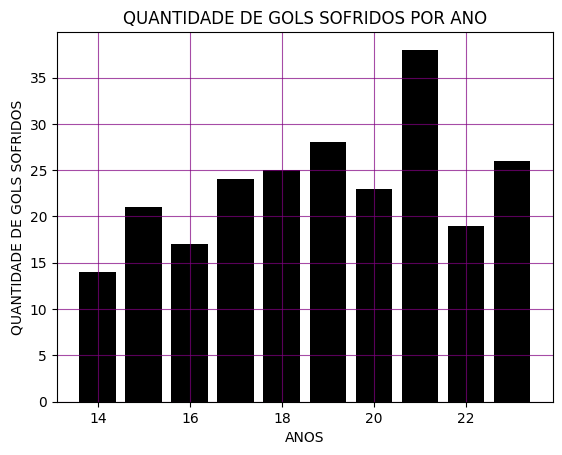

In [37]:
# No Polars ".index" não existe, temos que tirar os índices do dataframe
anos = quant_gols_ano['ANO'].to_list()
gols = quant_gols_ano['Total de Gols Sofridos'].to_list()

plt.bar(anos, gols, color='black')

# Rótulos do gráfico
plt.xlabel('ANOS')
plt.ylabel('QUANTIDADE DE GOLS SOFRIDOS')
plt.title('QUANTIDADE DE GOLS SOFRIDOS POR ANO')

# Formatando grades do gráfico
plt.grid(True, linestyle='-', alpha=0.7, color='purple')

plt.show()

- Qual time mais perdeu pelo Corinthians, nesse intervalo de tempo ? $: (14/05/2014 - 07/10/2023)$


In [47]:
team_lost = (
    df.filter(pl.col('RESULTADO') == 'V')  # Filtra derrotas
    .group_by('VISITANTE')  # Agrupa por time visitante
    .agg(pl.len().alias("total_derrotas"))  # Conta quantas derrotas cada time teve
    .sort("total_derrotas", descending=True)  # Ordena do maior para o menor
    .select("VISITANTE")  # Pega apenas a coluna de time
    .row(0)[0]  # Pega o primeiro time da lista (com mais derrotas)
)


print(f"Time com mais derrotas como visitante: {team_lost}")

Time com mais derrotas como visitante: SÃO PAULO


- Tabela de técnicos e o seu número de vitórias

In [67]:
coach_victory = (
    df.filter(pl.col('RESULTADO') == 'V')  # Filtra apenas vitórias
    .group_by('TÉCNICO')  # Agrupa por técnico
    .agg(pl.len().alias("total_vitorias")).sort("total_vitorias", descending=True)  # Conta quantas vitórias cada técnico tem
  
)

print(coach_victory)

shape: (17, 2)
┌─────────────────────┬────────────────┐
│ TÉCNICO             ┆ total_vitorias │
│ ---                 ┆ ---            │
│ str                 ┆ u32            │
╞═════════════════════╪════════════════╡
│ FÁBIO CARILLE       ┆ 48             │
│ TITE                ┆ 41             │
│ VÍTOR PEREIRA       ┆ 18             │
│ MANO MENEZES        ┆ 12             │
│ FERNANDO LÁZARO     ┆ 11             │
│ …                   ┆ …              │
│ DYEGO COELHO        ┆ 3              │
│ OSWALDO DE OLIVEIRA ┆ 2              │
│ FILIPE ALMEIDA      ┆ 1              │
│ CUCA                ┆ 1              │
│ EVANDRO FORNARI     ┆ 1              │
└─────────────────────┴────────────────┘


- Árbitro que mais apitaram em derrotas do Corinthians

In [74]:
judge = (df.filter(pl.col("RESULTADO") == "D")
         .group_by("ÁRBITRO")
         .agg(pl.len().alias("Derrotas"))
         ).sort("Derrotas", descending=True)


print(f"TOP 3 árbitros que mais apitaram em jogos que o Corinthians PERDEU: \n \n{judge[:3]}")

TOP 3 árbitros que mais apitaram em jogos que o Corinthians PERDEU: 
 
shape: (3, 2)
┌───────────────────────────┬──────────┐
│ ÁRBITRO                   ┆ Derrotas │
│ ---                       ┆ ---      │
│ str                       ┆ u32      │
╞═══════════════════════════╪══════════╡
│ LEANDRO PEDRO VUADEN      ┆ 4        │
│ RODRIGO D'ALONSO FERREIRA ┆ 3        │
│ BRUNO ARLEU DE ARAÚJO     ┆ 2        │
└───────────────────────────┴──────────┘
